In [14]:
%matplotlib inline
import pymc3 as pm
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
import scipy.stats as stats
figsize(12.5, 4)
import pandas as pd

In [15]:
wipObservations = pd.read_csv("/Users/robertk/Documents/GitHub/evolveNotebooks/Skeyos/InProgressObservations.csv")
wipObservations.head()


,date,SP_count
0,2018-11-01,9
1,2018-11-02,10
2,2018-11-03,10
3,2018-11-04,10
4,2018-11-05,11


In [16]:
cycleTime = pd.read_csv("/Users/robertk/Documents/GitHub/evolveNotebooks/Skeyos/DaysInDev.csv")
cycleTime.head()



,Unnamed: 0,days in dev
0,0,4
1,1,14
2,2,22
3,3,4
4,4,3


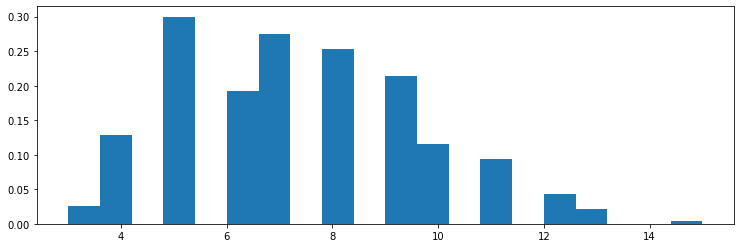

In [17]:
observations_wip = wipObservations['SP_count']
plt.hist( observations_wip, bins=20, density=True, histtype="stepfilled")
plt.title ='ffdf'
plt.show()



6.12987012987013


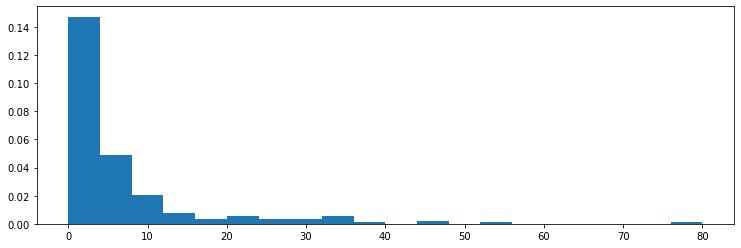

In [40]:
observations_avgCycleTime = cycleTime['days in dev']
print(observations_avgCycleTime.mean())
_= plt.hist(observations_avgCycleTime, bins=20, density=True, histtype="stepfilled")

In [56]:
# Set up the pymc3 model. Again assume Uniform priors for p_A and p_B.
with pm.Model() as model:

    mu1 = pm.Uniform("mu1", 0, 20)
    sigma1 = pm.Uniform("sigma1", 0, 20)
    
    mu2 = pm.Uniform("mu2", 0, 20)
    sigma2 = pm.Uniform("sigma2", 0, 20)
    lam1 = pm.Uniform("lam1", 0, 1)
    
    BoundedNormal = pm.Bound(pm.Normal, lower=0.0)
    

#    avgCycleTime = pm.Poisson("avgCycleTime", 1/observations_avgCycleTime.mean(), observed=observations_wip)
    avgWIP = BoundedNormal("avgWIP", mu=mu1, sigma=sigma1)
    avgCycleTime = pm.Exponential("avgCycleTime", lam=lam1)

    
#     # Define the deterministic delta function. This is our unknown of interest.
    troughput = pm.Deterministic("troughput", avgWIP / avgCycleTime)

    obs_avgWIP = pm.Normal("obs_avgWip", mu=mu1, sigma=sigma1, observed=observations_wip)
    obs_avgCycleTime = pm.Exponential("obs_avgCycleTime", lam=lam1, observed=observations_avgCycleTime)


    # To be explained in chapter 3.
    step = pm.Metropolis()
    trace = pm.sample(20000, step=step)
    burned_trace=trace[1000:]
    

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [avgCycleTime]
>Metropolis: [avgWIP]
>Metropolis: [lam1]
>Metropolis: [sigma2]
>Metropolis: [mu2]
>Metropolis: [sigma1]
>Metropolis: [mu1]
Sampling 4 chains, 0 divergences: 100%|██████████| 82000/82000 [00:24<00:00, 3294.59draws/s]
The number of effective samples is smaller than 10% for some parameters.


In [57]:
print(burned_trace[0])

{'mu1_interval__': -0.5082198055205037, 'sigma1_interval__': -1.9905222168144823, 'mu2_interval__': -0.7758485088624651, 'sigma2_interval__': 1.8003185654541538, 'lam1_interval__': -1.6818358845228187, 'avgWIP_lowerbound__': 2.065158433673686, 'avgCycleTime_log__': 0.3023486583105644, 'mu1': 7.512218746090591, 'sigma1': 2.4040325083402196, 'mu2': 6.304306328146295, 'sigma2': 17.16375418875684, 'lam1': 0.1568525205268655, 'avgWIP': 7.886547293339497, 'avgCycleTime': 1.3530328906417186, 'troughput': 5.82879200342207}


Model avgWIP mean 7.289098644530675
Data avgWIP mean 7.300771208226221


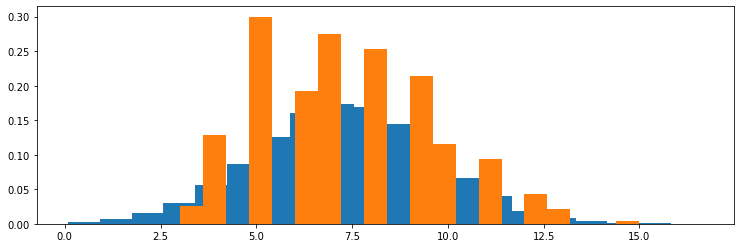

In [58]:
_ = plt.hist(burned_trace["avgWIP"], bins=20, density=True, histtype="stepfilled")
_ = plt.hist(observations_wip, bins=20, density=True, histtype="stepfilled")

print('Model avgWIP mean', burned_trace["avgWIP"].mean())
print('Data avgWIP mean', observations_wip.mean())


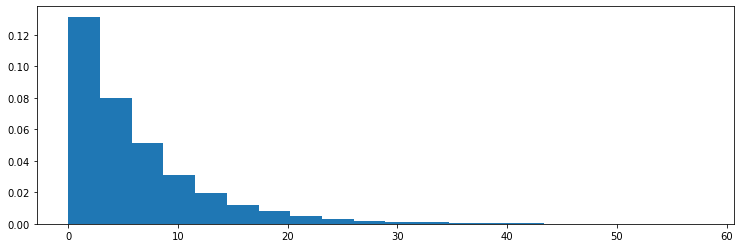

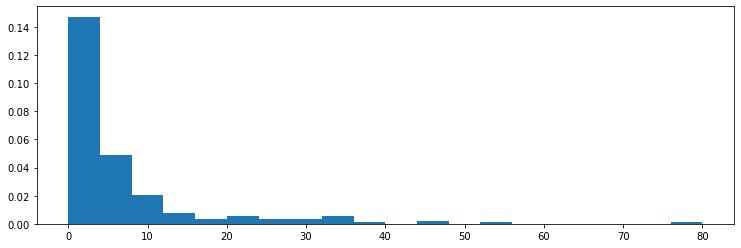

Model avgCycleTime mean 6.157296072019612
Data avgCycleTime mean 6.12987012987013


In [59]:
_ = plt.hist(burned_trace["avgCycleTime"], bins=20, density=True, histtype="stepfilled")
_ = plt.show()
_ = plt.hist(observations_avgCycleTime, bins=20, density=True, histtype="stepfilled")
_ = plt.show()
print('Model avgCycleTime mean', burned_trace["avgCycleTime"].mean())
print('Data avgCycleTime mean', observations_avgCycleTime.mean())

In [60]:
trace[0]

{'mu1_interval__': -0.5463950322801349,
 'sigma1_interval__': -2.060477726610806,
 'mu2_interval__': -2.1219446743134864,
 'sigma2_interval__': -2.191204537149585,
 'lam1_interval__': -1.5089948852531179,
 'avgWIP_lowerbound__': 2.2930490766615828,
 'avgCycleTime_log__': 2.0917271454300264,
 'mu1': 7.334023855562172,
 'sigma1': 2.259958779299774,
 'mu2': 2.139642803288319,
 'sigma2': 2.0108621958735995,
 'lam1': 0.18108779887620666,
 'avgWIP': 9.905093072879414,
 'avgCycleTime': 8.098891054306304,
 'troughput': 1.2230184362848942}

In [61]:
burned_trace[0]

{'mu1_interval__': -0.5082198055205037,
 'sigma1_interval__': -1.9905222168144823,
 'mu2_interval__': -0.7758485088624651,
 'sigma2_interval__': 1.8003185654541538,
 'lam1_interval__': -1.6818358845228187,
 'avgWIP_lowerbound__': 2.065158433673686,
 'avgCycleTime_log__': 0.3023486583105644,
 'mu1': 7.512218746090591,
 'sigma1': 2.4040325083402196,
 'mu2': 6.304306328146295,
 'sigma2': 17.16375418875684,
 'lam1': 0.1568525205268655,
 'avgWIP': 7.886547293339497,
 'avgCycleTime': 1.3530328906417186,
 'troughput': 5.82879200342207}

ValueError: too many values to unpack (expected 1)

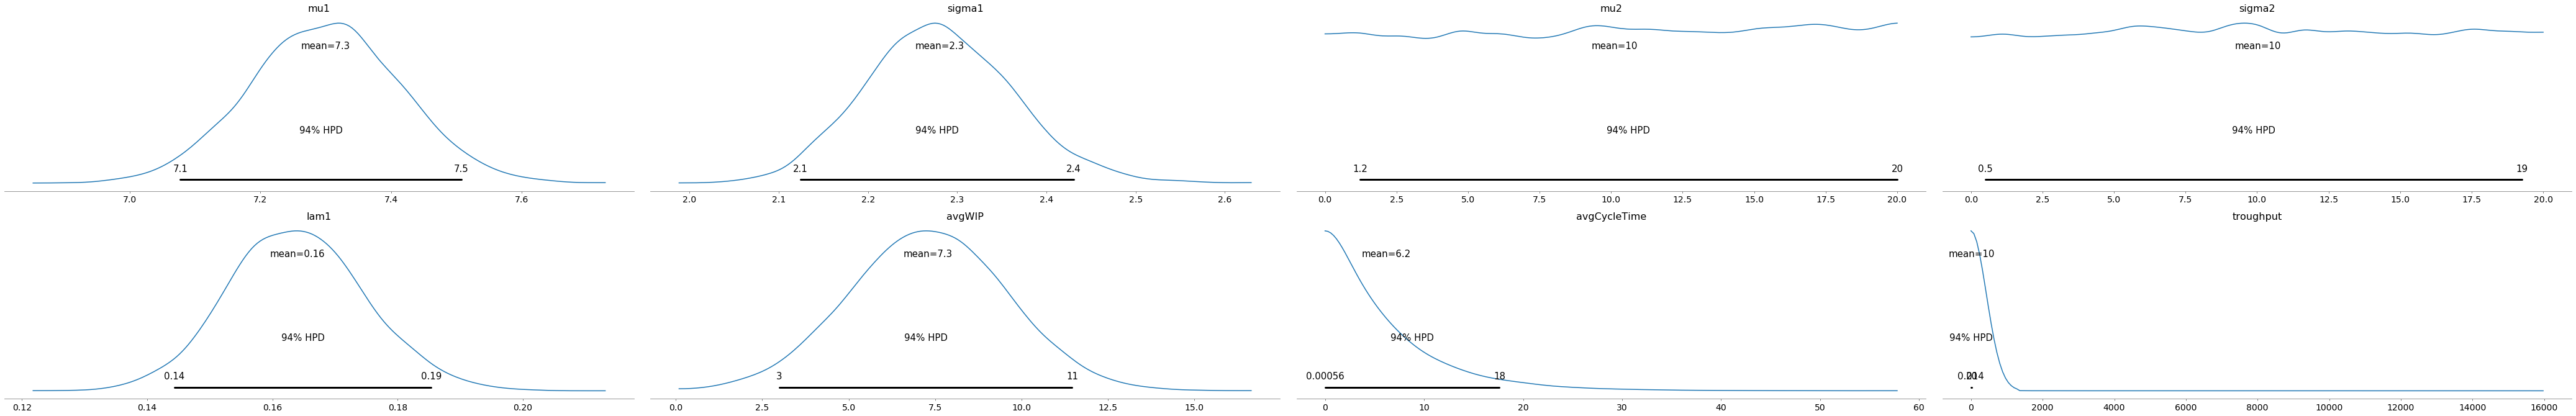

In [64]:
ax, = pm.plots.plot_posterior(trace)
ax.set_xlim(-5, 20)